# **Analysis of User Behaviour and Transaction Volumes on a Trading Platform**

This test is designed to assess the ability of candidates applying for the position of Brokerage Operations Data Analyst at a financial technology (fintech) company specializing in commission-free trading and investment services.



In [31]:
import pandas as pd
import numpy as np
import uuid
import matplotlib.pyplot as plt
#data_set.pki: a table of equity trades
#fields:
    #transaction_id: unique UUID of transaction
    #account_id: unique UUID of account
    #transaction_date: datetime.date of the transaction
    #transaction_time: timestamp of transaction
    #symbol: security bought or sold
    #side: buy or sell
    #type: fill or partial_fill
    #qty: # of shares bought or sold, could be fractional share, positive number for bought, negative for sold
    #price: price the shares were bought or sold at
data = pd.read_pickle('https://drive.google.com/uc?id=1N2xU6q4GvBrgC8otwR9FY6gsesUsdCqp') #load data from pkl file, link provided at interview
data.iloc[0] # output first row of data

,0
transaction_id,582802c8-f769-483e-b562-e8c981850042
account_id,74d00375-7a45-45da-9c95-6e83b7274330
transaction_date,2024-08-06
transaction_time,2024-08-06 19:00:50.325000
symbol,UPRO
side,buy
type,partial_fill
qty,1.348183
price,81.5171


## **Find the day with the largest absolute notional trading volume. Is the trading volume from this day associated with a particular set of symbols or users?**

Adding a column of the notional volume `Notional_vol`

In [32]:
data['Notional_vol'] = abs(data['qty'] * data['price'])
data

,transaction_id,account_id,transaction_date,transaction_time,symbol,side,type,qty,price,Notional_vol
0,582802c8-f769-483e-b562-e8c981850042,74d00375-7a45-45da-9c95-6e83b7274330,2024-08-06,2024-08-06 19:00:50.325,UPRO,buy,partial_fill,1.348183,81.5171,109.900000
1,c44f5be4-1542-4322-9fea-0723a347e643,2749adf3-f977-4b1a-bc46-3f8ce3fa7607,2024-08-06,2024-08-06 19:00:51.344,IYK,buy,fill,0.015092,70.2360,1.060000
2,51ee31e5-ceec-48cf-85b6-de1e8097a74c,b51ddf2d-a8eb-4d8f-8e31-56718aceebf9,2024-08-06,2024-08-06 19:00:41.282,TMF,sell,fill,-0.086874,58.0020,5.038871
3,3904eeff-049a-41f9-be80-dd5d26d29807,0711ab86-c4b7-433b-be82-46f84d33bead,2024-08-06,2024-08-06 18:10:45.063,TQQQ,sell,partial_fill,-0.216529,69.3129,15.008251
4,741ea0ab-289d-4362-8ca4-23e10f5df0f0,84afb265-15c8-488f-9a3e-8ba1f270a1a3,2024-08-06,2024-08-06 18:40:13.039,SOXL,sell,fill,-159.000000,38.3924,6104.391600
...,...,...,...,...,...,...,...,...,...,...
744387,03c7e783-e019-4849-96e5-f63f8d9d6dc3,d672a5c0-aba9-4068-8ca4-3ba5a2fd795e,2024-06-18,2024-06-18 19:52:22.926,DRIP,buy,fill,0.926893,9.9580,9.230000
744388,835d8c74-3707-478b-81a3-0b362c93b217,2057a886-89dc-4519-86c6-f24969afc204,2024-06-18,2024-06-18 19:52:27.344,ENS,buy,fill,0.037668,100.0860,3.770000
744389,f40bb1c9-37de-4800-b4aa-67e5222d1e40,67a110be-06fe-4797-af62-7e506edb31f4,2024-06-18,2024-06-18 19:52:47.653,GRBK,sell,fill,-0.189089,55.2780,10.452444
744390,a2832a5d-1a9e-47b2-baa5-c31d4ed49db9,7b96c73a-0400-4504-ab22-945d23d10456,2024-06-18,2024-06-18 19:52:44.466,UVXY,sell,fill,-1.000000,21.5136,21.513600


In [35]:
notional_trading_vol = data.groupby(['transaction_date'])['Notional_vol'].sum()
notional_trading_vol = notional_trading_vol.sort_values(ascending=False)
notional_trading_vol.head(10)

,Notional_vol
transaction_date,
2024-06-20,8.180876e+07
2024-07-18,4.929598e+07
2024-07-15,4.317931e+07
2024-07-03,4.248093e+07
2024-06-17,4.097084e+07
2024-06-27,4.079196e+07
2024-06-14,4.022941e+07
2024-07-12,3.661141e+07
2024-07-16,3.640105e+07


## **Answer 1/3**
the day with the largest absolute notional trading volume is 2024-06-20

In [36]:
#  Is the trading volume from this day associated with a particular set of symbols ?
data['transaction_date'] = pd.to_datetime(data['transaction_date'])
data_0620 = data[data["transaction_date"] == '2024-06-20']
data_0620_per_symbol = data_0620.groupby(['symbol'])['Notional_vol'].sum()
data_0620_per_symbol = data_0620_per_symbol.sort_values(ascending=False)
data_0620_per_symbol = data_0620_per_symbol.reset_index()
data_0620_per_symbol['rank_on_0620'] = data_0620_per_symbol.index.to_series().rank(method='first').astype(int)

data_per_symbol = data.groupby(['symbol'])['Notional_vol'].sum()
data_per_symbol = data_per_symbol.sort_values(ascending=False)
data_per_symbol = data_per_symbol.reset_index()
data_per_symbol['rank_full_period'] = data_per_symbol.index.to_series().rank(method='first').astype(int)

In [37]:
# Extract the top 10 accounts by volume for the specific date
top_10_data_0620 = data_0620_per_symbol.head(10)

# Extract the top 10 accounts by volume for the full period
top_10_data_full = data_per_symbol.head(10)

# Perform a left join on 'account_id' to add the 'rank_full_period' column
top_10_merged = top_10_data_0620.merge(
    top_10_data_full[['symbol', 'rank_full_period']],
    on='symbol',
    how='left'
)

# Replace NaN with 'Not in top 10'
top_10_merged['rank_full_period'] = top_10_merged['rank_full_period'].fillna('Not in top 10')

top_10_merged

,symbol,Notional_vol,rank_on_0620,rank_full_period
0,UVXY,2.539094e+07,1,2.0
1,TQQQ,1.638604e+07,2,1.0
2,BIL,4.783687e+06,3,3.0
3,VXX,2.927569e+06,4,Not in top 10
4,TMF,2.589468e+06,5,6.0
5,TECL,2.523805e+06,6,4.0
6,SOXS,2.407293e+06,7,Not in top 10
7,VIXY,1.915211e+06,8,Not in top 10
8,FNGU,1.370494e+06,9,9.0
9,UVIX,1.334159e+06,10,Not in top 10


## **Answer 2/3**

On 20th June 2024, the top three symbols were UVXY, TQQQ, and BIL. These symbols also ranked as the top three over the entire period from 8th June 2024 to 8th August 2024. However, there is a slight variation: TQQQ ranks first for the whole period, while UVXY is second.

**UVXY (ProShares Ultra VIX Short-Term Futures ETF)**: UVXY is designed to track twice the daily performance of the S&P 500 VIX Short-Term Futures Index. It is a volatility ETF, often used by traders to hedge against market uncertainty or to speculate on spikes in volatility. UVXY tends to rise when market volatility increases (such as during a market downturn) but is very risky and can lose value quickly due to its leveraged nature.

**TQQQ (ProShares UltraPro QQQ)**: TQQQ is a leveraged ETF that aims to provide three times (3x) the daily performance of the Nasdaq-100 Index. It is a high-risk, high-reward product, suitable for investors looking to amplify gains in tech-heavy sectors like those in the Nasdaq-100, but also exposing them to significant losses if the market moves against them.

**BIL (SPDR Bloomberg Barclays 1-3 Month T-Bill ETF)**: BIL is a conservative ETF that tracks short-term U.S. Treasury bills (1-3 months). It aims to provide a safe, low-risk investment option, often used by investors seeking stability or a cash-equivalent investment during periods of market uncertainty. Returns are lower compared to more volatile ETFs but are relatively stable, reflecting short-term interest rates.

Each of these ETFs serves different investment goals, with UVXY and TQQQ being more volatile and risk-prone, while BIL offers more safety and stability, which explains why UVXY and TQQQ swap places, while BIL remains in third position.







In [38]:
#  Is the trading volume from this day associated with a particular set of users?

data_0620 = data[data["transaction_date"] == '2024-06-20' ]
data_0620_per_account_id = data_0620.groupby(['account_id'])['Notional_vol'].sum()
data_0620_per_account_id = data_0620_per_account_id.sort_values(ascending=False)
data_0620_per_account_id = data_0620_per_account_id.reset_index()
data_0620_per_account_id['rank_on_0620'] = data_0620_per_account_id.index.to_series().rank(method='first').astype(int)

data_per_account_id = data.groupby(['account_id'])['Notional_vol'].sum()
data_per_account_id = data_per_account_id.sort_values(ascending=False)
data_per_account_id = data_per_account_id.reset_index()
data_per_account_id['rank_full_period'] = data_per_account_id.index.to_series().rank(method='first').astype(int)


In [39]:
# Extract the top 10 accounts by volume for the specific date
top_10_data_0620 = data_0620_per_account_id.head(10)

# Extract the top 10 accounts by volume for the full period
top_10_data_full = data_per_account_id.head(10)

# Perform a left join on 'account_id' to add the 'rank_full_period' column
top_10_merged = top_10_data_0620.merge(
    top_10_data_full[['account_id', 'rank_full_period']],
    on='account_id',
    how='left'
)

# Replace NaN with 'Not in top 10'
top_10_merged['rank_full_period'] = top_10_merged['rank_full_period'].fillna('Not in top 10')

top_10_merged

,account_id,Notional_vol,rank_on_0620,rank_full_period
0,7b96c73a-0400-4504-ab22-945d23d10456,2.651158e+06,1,Not in top 10
1,836e8c9e-0c83-4882-bbea-22080176f2fe,2.072868e+06,2,Not in top 10
2,7c518265-1871-435b-95d0-369be97b2695,1.913658e+06,3,Not in top 10
3,f44b7492-ce04-456b-aff8-b0fb0dc1dd3b,1.825822e+06,4,1.0
4,531dbe53-91ca-4085-8003-d4ae2042bc2c,1.796382e+06,5,4.0
5,6d15cec1-663c-4231-977c-44c1597789c4,1.413608e+06,6,3.0
6,34d95dff-e171-43c9-989c-d45721e3f3f2,1.214744e+06,7,5.0
7,47e0085a-b988-4ea1-9862-8e946ad7705c,1.164431e+06,8,2.0
8,bb8517de-337f-4c1f-ab89-ac4b79215d45,1.122714e+06,9,7.0
9,5876fc4f-6fb2-4128-b5d6-b2dc762eb4af,1.097662e+06,10,Not in top 10


## **Answer**

It can be observed that the three largest traders of the day with the largest absolute notional trading volume are not in the top 10 over the entire period from 8th June 2024 to 8th August 2024.

## **The trades contained in this data set are all from a particular group of users associated with one business relationship.**
## **Is there anything you notice about the trading behaviour that is common between all the users?**

Notional transaction volume for sales and for purchases per day over the period

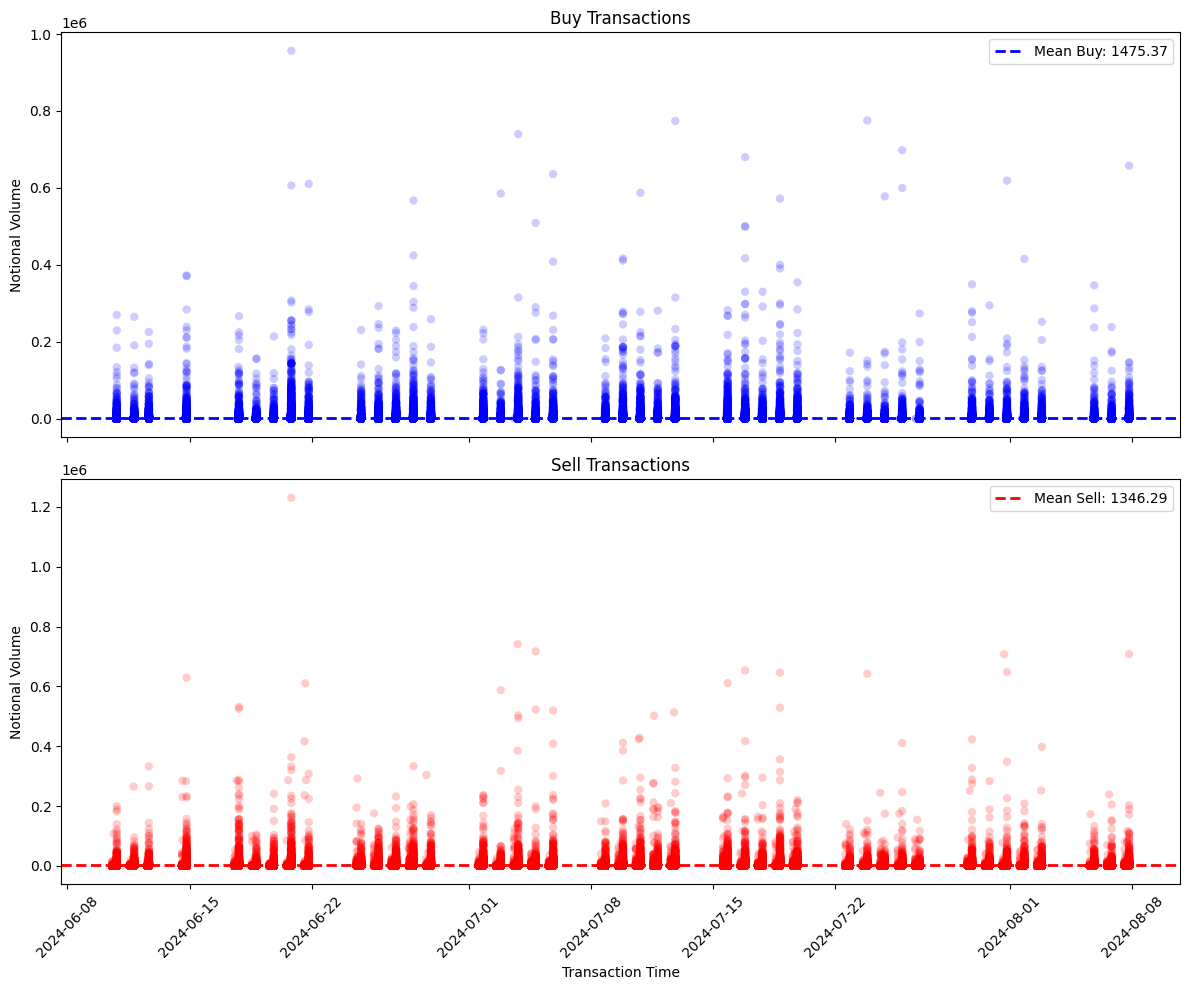

In [40]:
# Filter the data for "buy" and "sell"
data_buy = data[data['side'] == 'buy']
data_sell = data[data['side'] == 'sell']

# Calculate the overall averages of the Notional Volume
mean_buy = data_buy['Notional_vol'].mean()
mean_sell = data_sell['Notional_vol'].mean()

# Create the figures for the two scatter plots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Scatter plot for "buy"
axes[0].scatter(
    data_buy['transaction_time'],
    data_buy['Notional_vol'],
    alpha=0.2,
    c='blue',
    edgecolor='none'
)
axes[0].axhline(mean_buy, color='blue', linestyle='--', linewidth=2, label=f'Mean Buy: {mean_buy:.2f}')
axes[0].set_title('Buy Transactions')
axes[0].set_ylabel('Notional Volume')
axes[0].legend()

# Scatter plot for "sell"
axes[1].scatter(
    data_sell['transaction_time'],
    data_sell['Notional_vol'],
    alpha=0.2,
    c='red',
    edgecolor='none'
)
axes[1].axhline(mean_sell, color='red', linestyle='--', linewidth=2, label=f'Mean Sell: {mean_sell:.2f}')
axes[1].set_title('Sell Transactions')
axes[1].set_xlabel('Transaction Time')
axes[1].set_ylabel('Notional Volume')
axes[1].legend()

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


## **Answer 1/5**
Analysis of User Behaviour over the Period

There are no trades on Sundays and Mondays as financial markets are closed.

The average notional transaction volume for sales = 1346.29

The average notional transaction volume for purchases = 1475.37

This suggests that most trades are of a relatively small to medium size, with very few trades occurring at larger volumes. Indeed, the transparency of the data points (alpha=0.2) on both graphs shows that the majority of trades occur around the average (with more opaque colours), and few transactions take place beyond a notional volume of 200,000 (with points being very scattered beyond this threshold).

The fact that the average buy transaction notional volume is slightly higher than the sell volume could indicate a marginal preference for buying during the observed period.

Given that the period spans from 8th June 2024 to 8th August 2024, it is possible that the higher average notional transaction volume for purchases reflects typical summer market trends. During the summer months, many investors may adopt a more relaxed approach, as it coincides with holiday seasons when some traders are away or less active.

Finally, it is difficult to determine the overall trend or weekly variations from this graph. To address this, we will perform a time series decomposition.

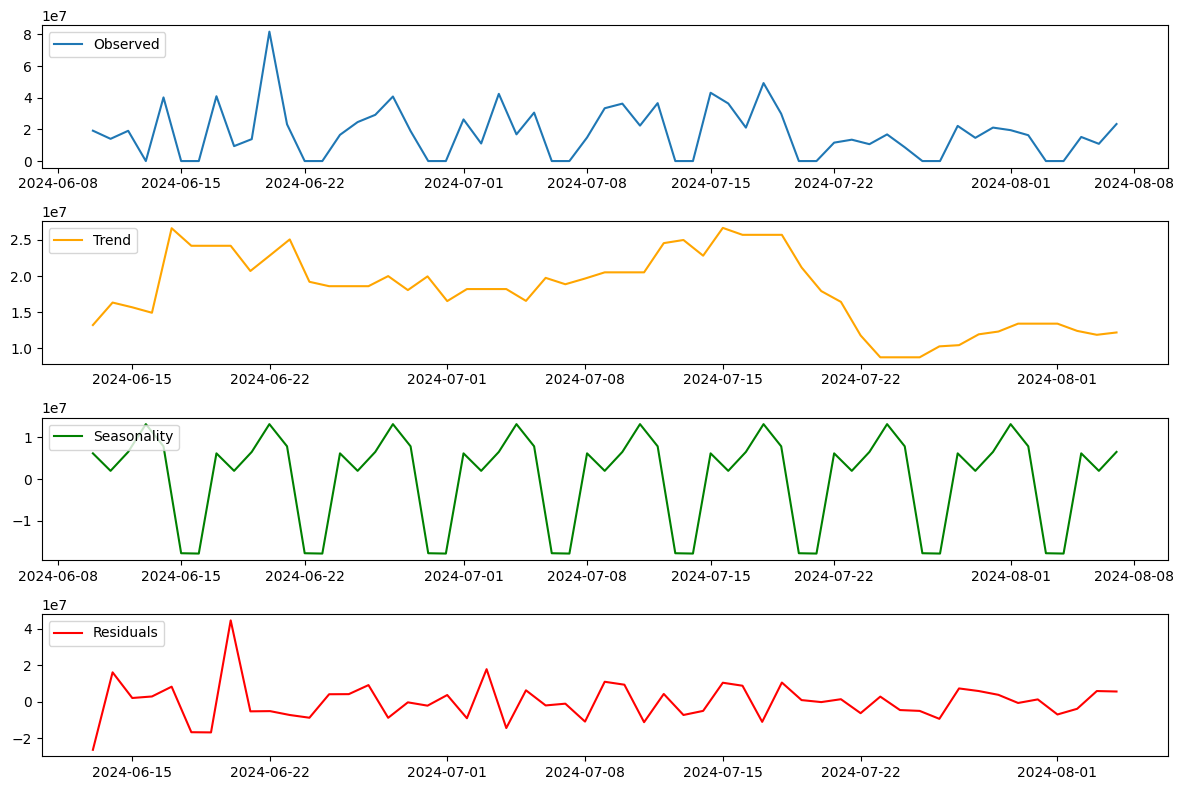

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

data = pd.read_pickle('https://drive.google.com/uc?id=1N2xU6q4GvBrgC8otwR9FY6gsesUsdCqp')
data['Notional_vol'] = abs(data['qty'] * data['price'])

data['transaction_time'] = pd.to_datetime(data['transaction_time'])

data.set_index('transaction_time', inplace=True)

# Aggregate the notional volumes by day (or other time interval)
daily_notional = data['Notional_vol'].resample('D').sum()

# Time series decomposition
decomposition = seasonal_decompose(daily_notional, model='additive', period=7)  # Ajustez 'period' selon vos données

# Visualise the components of the decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


## **Answer 2/5**

The 7-day seasonality indicates that users are more active on certain days of the week. For instance, there is a significant increase on Tuesdays (the stock market opening day), a drop in activity on Wednesdays, and a new peak on Fridays, as it marks the end of the work week for most working individuals in France and the United States (people are more relaxed as they anticipate a weekend of rest).  

The decline in the trend from mid-July may indicate a decrease in overall use engagement linked to an external factor (holidays, policy changes, etc.). In the U.S.: 13 July - an assassination attempt on Trump; 21 July - Joe Biden announces he will not seek re-election. In France: resignation of Gabriel Attal’s government, which remains in office to handle ongoing affairs.  

The peaks observed in the raw series (Observed) and reflected in the residuals may be associated with specific events such as launches, competitions, or promotions. While the residuals show some volatility, most variations appear to be well explained by the trend and seasonality.


Notional transaction volume for sales and for purchases over the day

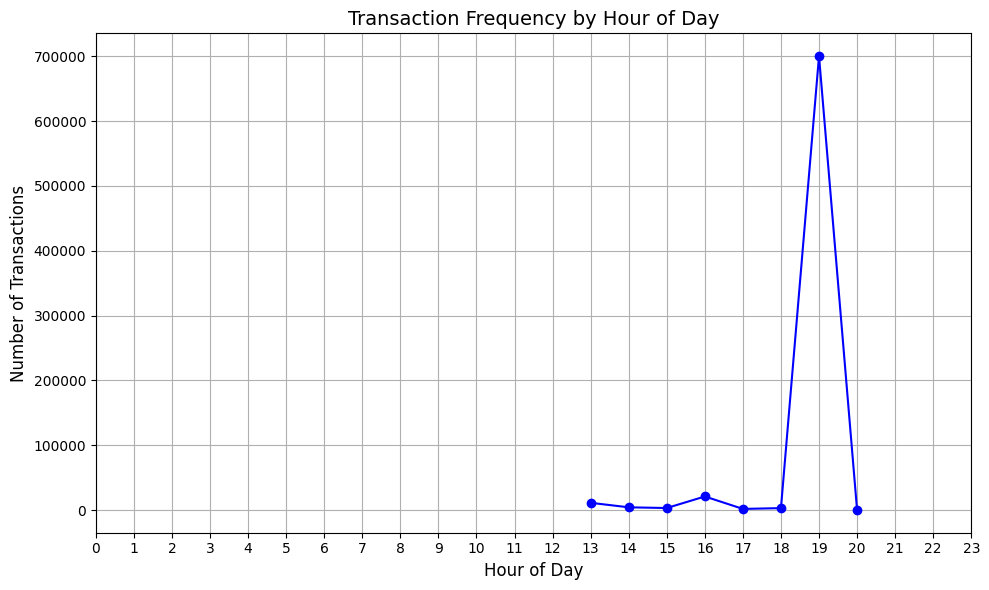

In [43]:
data = pd.read_pickle('https://drive.google.com/uc?id=1N2xU6q4GvBrgC8otwR9FY6gsesUsdCqp')
data['Notional_vol'] = abs(data['qty'] * data['price'])

data['transaction_time'] = pd.to_datetime(data['transaction_time'])

# Extract the hour of the day from the 'transaction_time' column
data['hour_of_day'] = data['transaction_time'].dt.hour

# Count the number of transactions per hour
transaction_counts_by_hour = data.groupby('hour_of_day')['transaction_id'].count()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(transaction_counts_by_hour.index, transaction_counts_by_hour.values, marker='o', linestyle='-', color='b')
plt.title("Transaction Frequency by Hour of Day", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


## **Answer 3/5**

By studying the activity of traders on the platform throughout the day, we observe a peak in activity between 6 PM and 8 PM, which corresponds to the end of the workday.

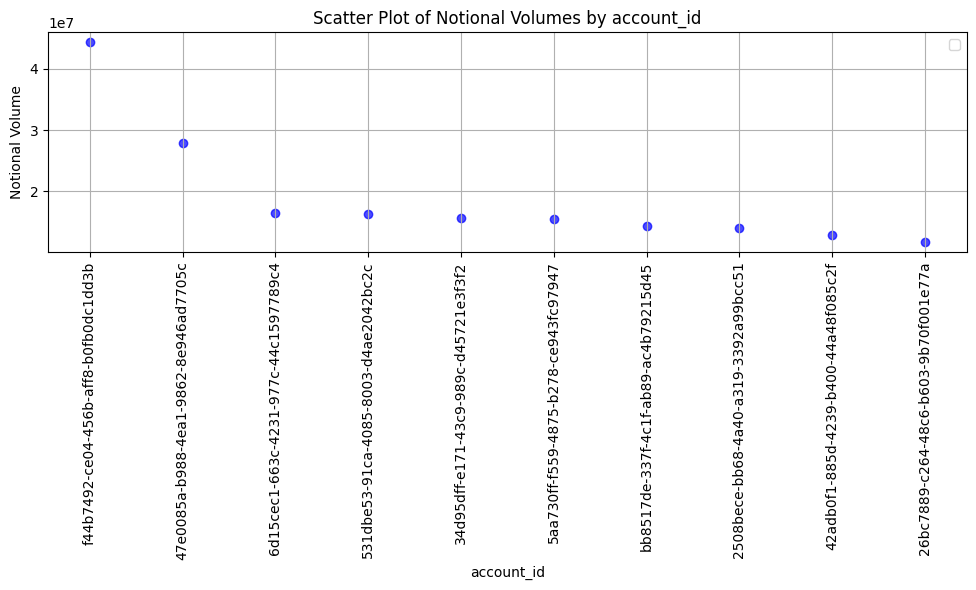

In [44]:
plt.figure(figsize=(10, 6))

plt.scatter(data_per_account_id.head(10)['account_id'].astype(str), data_per_account_id.head(10)['Notional_vol'], alpha=0.7, color='blue')

plt.xticks(rotation=90)
plt.title("Scatter Plot of Notional Volumes by account_id")
plt.xlabel("account_id")
plt.ylabel("Notional Volume")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## **Answer 4/5**

From the scatter plot above, we can see that two platform users stand out due to significantly higher trade volumes compared to all the other users, whose total notional trade volumes over the period are below 10^7.


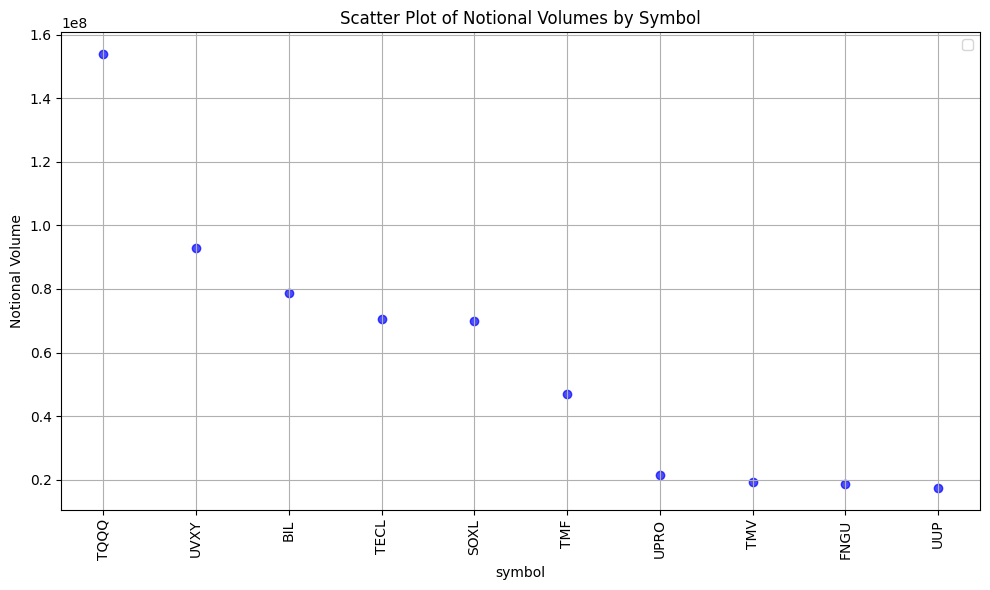

In [45]:
plt.figure(figsize=(10, 6))

plt.scatter(data_per_symbol.head(10)['symbol'].astype(str), data_per_symbol.head(10)['Notional_vol'], alpha=0.7, color='blue')

plt.xticks(rotation=90)
plt.title("Scatter Plot of Notional Volumes by Symbol")
plt.xlabel("symbol")
plt.ylabel("Notional Volume")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## **Answer 5/5**

Users trade significantly more on the ETFs TQQQ, UVXY, BIL, TECL, SOXL, and TMF than on others. Indeed, these ETFs are more sensitive to market movements, specific growing sectors, and volatility, making them popular among traders seeking quick short-term gains.